In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [4]:
import pandas as pd
raw_matched_data = pd.read_csv('match_with_label.csv')
raw_matched_data = raw_matched_data.drop(columns=['Unnamed: 0','decorated_indicator'])

<h1> Preprocessing </h1>

In [5]:
raw_matched_data.head()

,manage_shop_indicator,officialstore_indicator,preferred_shop_indicator,crossborder_indicator,shop_category,new_seller_flag,seller_centre_login_L30D,shop_sku_number,shop_follower_number,shop_L180D_order,weighted_shop_rating,performance_date,masked_item_impression,masked_order,masked_shop_page_view,masked_shop_click_from_search,masked_campaign_tab_click,masked_other_tab_click,shop_index,rf_label
0,0,0,0,0,1,0,4,258,975,405,4.842105,5,25.0,0.0,0,1.421053,11,21.526316,311799375,0
1,0,0,0,0,1,0,4,258,975,405,4.947368,3,36.0,0.0,0,1.000000,11,14.000000,311799375,0
2,0,0,0,0,1,0,4,258,975,405,5.000000,8,121.0,0.0,0,1.473684,11,21.526316,311799375,0
3,0,0,0,0,1,0,4,258,975,405,4.894737,12,9.0,0.0,0,1.000000,11,25.578947,311799375,0
4,0,0,0,0,1,0,4,258,975,405,4.894737,2,225.0,0.0,0,1.000000,11,19.789474,311799375,0


In [6]:
matched_data = raw_matched_data.groupby('shop_index').sum()
matched_data.describe()

,manage_shop_indicator,officialstore_indicator,preferred_shop_indicator,crossborder_indicator,shop_category,new_seller_flag,seller_centre_login_L30D,shop_sku_number,shop_follower_number,shop_L180D_order,weighted_shop_rating,performance_date,masked_item_impression,masked_order,masked_shop_page_view,masked_shop_click_from_search,masked_campaign_tab_click,masked_other_tab_click,rf_label
count,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,1.803800e+04,1.803800e+04,18038.000000,18038.0,1.803800e+04,1.803800e+04,18038.000000,1.803800e+04,18038.0,1.803800e+04,18038.000000
mean,0.218095,0.018627,0.201796,0.974055,125.493181,1.875152,86.184832,8049.407806,3.095218e+04,5.548797e+04,62.961205,105.0,7.099896e+10,2.223701e+09,2253.032986,7.775571e+02,154.0,9.867574e+02,1.926378
std,1.733763,0.510343,1.668706,3.562118,93.779286,4.768354,113.483056,19684.791117,2.894518e+05,1.020307e+06,8.843581,0.0,7.081792e+12,2.941624e+11,10163.845121,3.724075e+04,0.0,1.254815e+04,7.189336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3458.000000,1.360800e+04,5.670000e+03,0.000000,105.0,0.000000e+00,0.000000e+00,0.000000,1.400000e+01,154.0,1.965789e+02,0.000000
25%,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,14.000000,3612.000000,1.373400e+04,5.670000e+03,56.000000,105.0,7.600000e+01,0.000000e+00,0.000000,2.594737e+01,154.0,2.990526e+02,0.000000
50%,0.000000,0.000000,0.000000,0.000000,112.000000,0.000000,28.000000,4382.000000,1.419600e+04,5.670000e+03,66.263158,105.0,1.986950e+04,0.000000e+00,81.000000,3.942105e+01,154.0,3.390000e+02,0.000000
75%,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,98.000000,6538.000000,1.591800e+04,6.580000e+03,70.000000,105.0,1.067322e+06,1.300000e+01,1072.750000,9.478947e+01,154.0,4.177368e+02,0.000000
max,14.000000,14.000000,14.000000,14.000000,280.000000,14.000000,420.000000,768684.000000,3.466277e+07,1.221056e+08,70.000000,105.0,9.373605e+14,3.950721e+13,615621.000000,4.876214e+06,154.0,1.529625e+06,56.000000


In [7]:
matched_data.head()

,manage_shop_indicator,officialstore_indicator,preferred_shop_indicator,crossborder_indicator,shop_category,new_seller_flag,seller_centre_login_L30D,shop_sku_number,shop_follower_number,shop_L180D_order,weighted_shop_rating,performance_date,masked_item_impression,masked_order,masked_shop_page_view,masked_shop_click_from_search,masked_campaign_tab_click,masked_other_tab_click,rf_label
shop_index,,,,,,,,,,,,,,,,,,,
207225,0,0,0,0,14,0,28,3766,14406,6580,28.0,105,36.0,0.0,368,19.684211,154,304.263158,0
308340,0,0,0,0,126,0,28,5922,16002,7126,56.0,105,343165.0,0.0,16972,74.368421,154,323.947368,0
350280,0,0,0,0,14,0,154,6538,22974,7308,70.0,105,2245074.0,1.0,302,164.315789,154,333.210526,0
396360,0,0,0,0,70,0,14,5768,79800,6398,28.0,105,77930.0,0.0,9024,83.473684,154,417.736842,0
412875,0,0,0,0,280,0,14,3458,16002,5670,0.0,105,0.0,0.0,2879,25.368421,154,404.421053,0


<h3> Feature Selection </h3>

In [8]:
## load data
raw_data = pd.read_csv("match_with_label.csv")
raw_data = raw_data.drop(columns=['Unnamed: 0','decorated_indicator'])

In [9]:
raw_data_X = raw_data.drop("masked_order",1)
raw_data_y = raw_data["masked_order"]

/Users/miya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [10]:
#get unmatched shop features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(raw_data_X,raw_data_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(raw_data_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

                            Specs          Score
12         masked_item_impression  364608.363609
16         masked_other_tab_click   45292.058007
9                shop_L180D_order   17724.359481
8            shop_follower_number   17696.960476
14  masked_shop_click_from_search     147.405012


/Users/miya/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/Users/miya/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [11]:
features = featureScores.nlargest(5,'Score')
features = features['Specs'].tolist()
features

['masked_item_impression',
 'masked_other_tab_click',
 'shop_L180D_order',
 'shop_follower_number',
 'masked_shop_click_from_search']

<h1>Prediction </h1>

In [14]:
#prediction on umatched data with features selected
matched_data.head()
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
model1=linear_model.LinearRegression()
#features = ['shop_L180D_order','masked_item_impression','masked_other_tab_click','shop_follower_number']

X = matched_data[features]
y = matched_data['masked_order']
# print(X.shape,y.shape)


<h4> Log transformation visualizations </h4>

array([[<AxesSubplot:title={'center':'shop_L180D_order'}>,
        <AxesSubplot:title={'center':'log(shop_L180D_order + 1)'}>]],
      dtype=object)

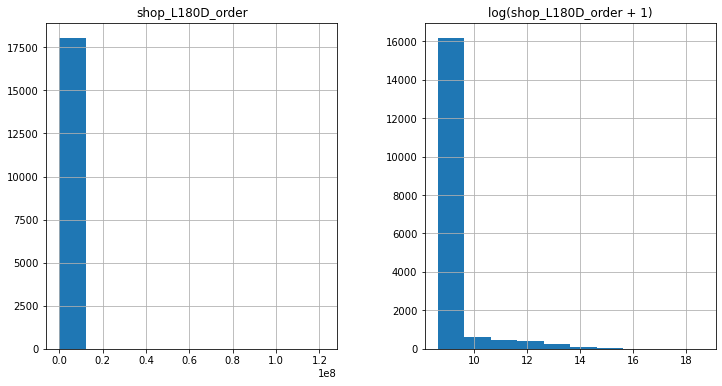

In [15]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
shop_L180D_order = pd.DataFrame({"shop_L180D_order":X["shop_L180D_order"], "log(shop_L180D_order + 1)":np.log1p(X["shop_L180D_order"])})
shop_L180D_order.hist()

array([[<AxesSubplot:title={'center':'masked_order'}>,
        <AxesSubplot:title={'center':'log(masked_order + 1)'}>]],
      dtype=object)

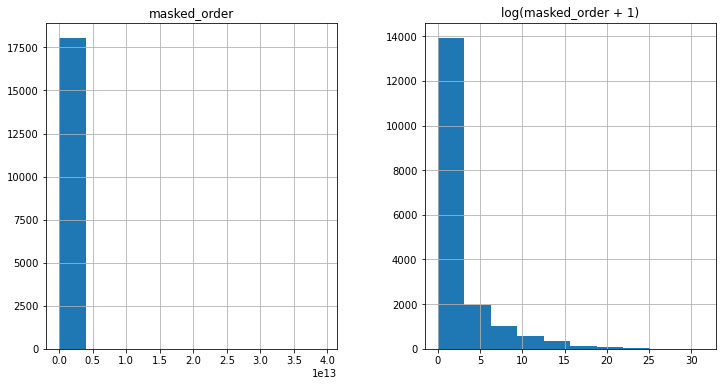

In [16]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
masked_order = pd.DataFrame({"masked_order":y, "log(masked_order + 1)":np.log1p(y)})
masked_order.hist()

<h4> Log Transformation </h4>

In [17]:
#log transform the target:
y = np.log1p(y)

#log transform skewed numeric features:
numeric_feats = X.dtypes[X.dtypes != "object"].index

skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

X[skewed_feats] = np.log1p(X[skewed_feats])

/Users/miya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<h3> RandomForestRegressor Model </h3>

In [19]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn import metrics
RFregressor_model = RandomForestRegressor()
RFregressor_model.fit(X_train,y_train)

test_predicted_orders = RFregressor_model.predict(X_test)
print(test_predicted_orders)
print("MSE for Random Forest Regressor:",metrics.mean_squared_log_error(test_predicted_orders, y_test))
# print(metrics.mean_squared_log_error(predicted_prices, y_test))

[ 1.99452385  2.07241752  5.16138312 ...  1.35064172 11.47124932
  0.02302585]
MSE for Random Forest Regressor: 0.2617998163274457


In [20]:
#evaluation
from sklearn.metrics import r2_score
r2_score(y_test, test_predicted_orders)

0.8100731458983057

<h4> Actual Prediction </h4>

In [21]:
#dataset
X = raw_matched_data[features]

In [22]:
predicted_orders = RFregressor_model.predict(X)
predicted_orders

array([25.61071641, 28.63439907, 28.63439907, ...,  3.13820633,
        3.00002885, 28.63439907])

In [23]:
raw_matched_data.loc[:,'predicted_orders'] = predicted_orders
campaignday_prediction = raw_matched_data[raw_matched_data['performance_date'] == 8]

In [24]:
sorted_campaignday_prediction = campaignday_prediction.sort_values(by = 'predicted_orders',ascending = False)

In [25]:
len(sorted_campaignday_prediction)

18038

<h4> Option 1: Top N Percentage Selection Method </h4>

In [26]:
n_percentage = 20
top_n_per_matched_shops = sorted_campaignday_prediction.head(int(len(sorted_campaignday_prediction)*(n_percentage/100)))

In [27]:
len(top_n_per_matched_shops)

3607

In [28]:
# top n distribution
topn_dist = top_n_per_matched_shops['rf_label'].value_counts()
topn_dist

0    2541
1     821
4     129
2     114
3       2
Name: rf_label, dtype: int64

In [29]:
# original distribution
raw_dist = raw_matched_data['rf_label'].value_counts()
raw_dist

0    228494
1     18410
2      3066
4      2520
3        42
Name: rf_label, dtype: int64

In [30]:
per_pd = pd.DataFrame({'top n numbers':topn_dist,'cluster numbers':raw_dist})
per_pd

,top n numbers,cluster numbers
0,2541,228494
1,821,18410
2,114,3066
3,2,42
4,129,2520


In [31]:
per_pd.loc[:,'percentage'] = per_pd['top n numbers'].values/per_pd['cluster numbers'].values

In [36]:
topn_result_df = per_pd.sort_values(by = 'percentage',ascending = False)
topn_result_df

,top n numbers,cluster numbers,percentage
4,129,2520,0.051190
3,2,42,0.047619
1,821,18410,0.044595
2,114,3066,0.037182
0,2541,228494,0.011121


<h4> Option 2: Avergae Selection </h4>

In [37]:
avg_result = sorted_campaignday_prediction.groupby('rf_label').mean()['predicted_orders'].sort_values(ascending = False)
avg_result

rf_label
4    28.864506
3    28.810080
1    28.753688
2    27.604969
0    19.659321
Name: predicted_orders, dtype: float64

In [38]:
median_result = sorted_campaignday_prediction.groupby('rf_label').median()['predicted_orders'].sort_values(ascending = False)
median_result

rf_label
1    28.995914
4    28.995914
2    28.732800
3    28.732800
0    28.634399
Name: predicted_orders, dtype: float64

<h4> Output </h4>

In [52]:
selected_clusters = [topn_result_df.index[0],topn_result_df.index[1]]
selected_clusters

[4, 3]

In [59]:
selected_matched_data = pd.concat([raw_matched_data[raw_matched_data['rf_label'] == selected_clusters[0]],raw_matched_data[raw_matched_data['rf_label'] == selected_clusters[1]]])
selected_matched_data

,manage_shop_indicator,officialstore_indicator,preferred_shop_indicator,crossborder_indicator,shop_category,new_seller_flag,seller_centre_login_L30D,shop_sku_number,shop_follower_number,shop_L180D_order,...,performance_date,masked_item_impression,masked_order,masked_shop_page_view,masked_shop_click_from_search,masked_campaign_tab_click,masked_other_tab_click,shop_index,rf_label,predicted_orders
938,0,0,0,1,7,0,16,11093,972,405,...,13,1062961.0,0.0,0,17.684211,11,23.842105,1357898220,4,28.995914
939,0,0,0,1,7,0,16,11093,972,405,...,6,1085764.0,0.0,0,25.210526,11,25.578947,1357898220,4,28.995914
940,0,0,0,1,7,0,16,11093,972,405,...,12,1046529.0,0.0,0,38.894737,11,23.842105,1357898220,4,28.995914
941,0,0,0,1,7,0,16,11093,972,405,...,3,1272384.0,0.0,0,11.157895,11,31.368421,1357898220,4,28.701525
942,0,0,0,1,7,0,16,11093,972,405,...,14,833569.0,0.0,0,104.631579,11,18.631579,1357898220,4,28.995914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97295,0,0,0,1,20,0,23,4680,2196,6372,...,12,4194304.0,27.0,0,12.631579,11,35.421053,893346345,3,28.976367
97296,0,0,0,1,20,0,23,4680,2196,6372,...,7,6466849.0,8.0,0,24.263158,11,14.000000,893346345,3,28.995914
97297,0,0,0,1,20,0,23,4680,2196,6372,...,8,20666116.0,343.0,0,57.947368,11,14.000000,893346345,3,28.995914
97298,0,0,0,1,20,0,23,4680,2196,6372,...,4,4068289.0,27.0,0,4.210526,11,53.368421,893346345,3,28.634399


In [60]:
selected_matched_data.to_csv(r'selected_matched_shops.csv', index = False)

<h1> KPI Prediction </h1>

<h4> Matched KPI Prediction  </h4>

In [68]:
KPI_matched = selected_matched_data['predicted_orders']
KPI_matched

938      28.995914
939      28.995914
940      28.995914
941      28.701525
942      28.995914
           ...    
97295    28.976367
97296    28.995914
97297    28.995914
97298    28.634399
97299    28.995914
Name: predicted_orders, Length: 2562, dtype: float64

<h4> Unmatched KPI Prediction </h4>

In [71]:
unmatched_data = pd.read_csv('selected_unmatch.csv')
X_unmatched = unmatched_data[features]

In [72]:
KPI_unmatched = RFregressor_model.predict(X_unmatched)

In [73]:
KPI_unmatched

array([28.99591385, 28.99591385, 28.63439907, 28.99591385, 28.99591385,
       28.99591385, 28.99591385, 28.70152481, 28.99591385, 28.99591385,
       28.99591385, 28.99591385, 28.63439907, 28.63439907, 28.63439907,
       28.63439907, 28.76800304, 28.63439907, 28.70152481, 28.63439907,
       28.99591385, 28.99591385, 28.63439907, 28.63439907, 28.99591385,
       28.63439907, 28.99591385, 28.63439907, 28.63439907, 28.99591385,
       28.99591385, 28.99591385, 28.99591385, 28.63439907, 28.73280045,
       28.65441818, 28.64659358, 28.99591385, 28.99591385, 28.99591385,
       28.99591385, 28.63439907, 28.99591385, 28.63439907, 28.73280045,
       28.63439907, 28.99591385, 28.99591385, 28.99591385, 28.99591385,
       28.99591385, 28.63439907, 28.99591385, 28.99591385, 28.99591385,
       28.63439907, 28.99591385, 28.73280045, 28.63439907, 28.99591385,
       28.99591385, 28.99591385, 28.97636699, 28.99591385, 28.63439907,
       28.99591385, 28.99591385, 28.99591385, 28.99591385, 28.99

<h4> Whitelisted KPI Prediction </h4>

In [74]:
whitelisted_shops = pd.read_csv('whitelist_filled_latest.csv')
X_whitelist = whitelisted_shops[features]

In [75]:
KPI_whitelisted = RFregressor_model.predict(X_whitelist)

In [76]:
KPI_whitelisted

array([28.99591385, 28.99591385, 28.99591385, ..., 28.99591385,
       28.73280045, 28.99591385])

<h4> Overall KPI </h4>

In [83]:
overall_KPI = sum(KPI_unmatched)+sum(KPI_whitelisted)+sum(KPI_matched)
overall_KPI

295585.48032787174

useless ---

## XGB

In [15]:
from xgboost import XGBRegressor

In [16]:
#import xgboost model
xgb_model = XGBRegressor()

In [18]:
#fit model and predict
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)

In [23]:
#calculate rmse
from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y_test, xgb_pred))
print(rmse)

1.5900560913231574


In [25]:
#r2 score calculatioin
r2_score(y_test, xgb_pred)

0.8195498438829059

<h4> useless for now </h4>

<h1> MLR </h1>

In [76]:
all_var = ['shop_L180D_order','masked_item_impression','masked_other_tab_click','shop_follower_number','masked_order']
all_data = data[all_var]

In [77]:
#log transform the target:
all_data['masked_order'] = np.log1p(all_data['masked_order'])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

/Users/miya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/miya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [78]:
#MLR
from sklearn import model_selection
import pandas as pd
import numpy as np
import statsmodels.api as sm

# features = ['shop_L180D_order','masked_item_impression','masked_other_tab_click','shop_follower_number']

model=sm.formula.ols('masked_order~shop_L180D_order+masked_item_impression+masked_other_tab_click+shop_follower_number',data=all_data).fit()
print('模型的偏回归系数分别为：',model.params)

模型的偏回归系数分别为： Intercept                -3.971648
shop_L180D_order          0.444399
masked_item_impression    0.057889
masked_other_tab_click    0.226693
shop_follower_number     -0.159477
dtype: float64


In [79]:
test_x = all_data.drop('masked_order',axis=1)
pred = model.predict(exog = test_x)
pd.DataFrame({'Prediction':pred,'Actual':test.masked_order})

,Prediction,Actual
shop_index,,
119700,2.453774,NaN
215775,2.571251,100175.0
406305,1.875591,NaN
505260,0.986274,NaN
1004355,1.890933,NaN
1687635,2.633525,17892.0
1881135,1.295655,28.0
2515815,2.612621,NaN
2678715,1.671623,1028.0


In [80]:
#模型的F检验
import numpy as np

#计算建模数据中的因变量的均值
ybar=train.masked_order.mean()

#统计变量个数和观测个数
p=model.df_model
n=train.shape[0]

#计算回归离差平方和
RSS=np.sum((model.fittedvalues-ybar)**2)

#计算误差平方和
ESS=np.sum(model.resid**2)

#计算F统计量的值
F=(RSS/p)/(ESS/(n-p-1))

print('F统计量的值：',F)
#对比结果

from scipy.stats import f

#计算F分布的理论值
F_Theory=f.ppf(q=0.95,dfn=p,dfd=n-p-1)
print('F分布的理论值为：',F_Theory)

#model summary
model.summary()


F统计量的值： 2.763401399975348e+17
F分布的理论值为： 2.3733248122893413


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           masked_order   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     4323.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:46:52   Log-Likelihood:                -6056.9
No. Observations:                7980   AIC:                         1.212e+04
Df Residuals:                    7975   BIC:                         1.216e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.9716      0.082    -48.312      0.000      -4.133      -3.810
shop_L180D_order           0.4444      0.008     56.506      0.000       0.429       0.460
masked_item_impression     0.0579      0.001     47.906      0.000       0.056       0.060
masked_other_tab_click     0.2267      0.011     21.291      0.000       0.206       0.248
shop_follower_number      -0.1595      0.014    -11.764      0.000      -0.186      -0.133
==============================================================================
Omnibus:                      149.605   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.507
Skew:                           0.305   Prob(JB):                     1.15e-36
Kurtosis:                       3.354   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model = model1.fit(X_train,y_train)
print(model.intercept_, model.coef_)
scores = - cross_val_score(model1, X_train,y_train , cv=5, scoring='neg_mean_squared_error')
print(np.mean(scores))

-4670839.181622916 [ 3.59120785e+02  5.63487847e-04  4.05618817e+03 -3.27481467e+02]
1.7663437861816112e+16


In [24]:
from sklearn import model_selection
def Stacking(model,train,y,test,n_fold):
    folds=model_selection.StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [58]:
test_pred1 ,train_pred1 = Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

#train_pred1=pd.DataFrame(train_pred1)
#test_pred1=pd.DataFrame(test_pred1)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [29]:
from sklearn import metrics
print("MSE for :",metrics.mean_squared_log_error(test_pred1, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [28974, 2634]